<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.1 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [2]:
import pandas as pd
import numpy as np
import folium
import seaborn as sns
import scipy

from matplotlib import pyplot as plt

%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Use what you have learned so far. Be creative. List all your findings.

In [3]:
# Read CSV
house_csv = "DATA/Sacramento_transactions.csv"

#load CSV into a DataFrame
df = pd.read_csv(house_csv)

In [4]:
#Check head of DataFrame
df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [5]:
#Check tail DataFrame
df.tail()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
980,9169 GARLINGTON CT,SACRAMENTO,95829,CA,4,3,2280,Residential,Thu May 15 00:00:00 EDT 2008,232425,38.457679,-121.359620
981,6932 RUSKUT WAY,SACRAMENTO,95823,CA,3,2,1477,Residential,Thu May 15 00:00:00 EDT 2008,234000,38.499893,-121.458890
982,7933 DAFFODIL WAY,CITRUS HEIGHTS,95610,CA,3,2,1216,Residential,Thu May 15 00:00:00 EDT 2008,235000,38.708824,-121.256803
983,8304 RED FOX WAY,ELK GROVE,95758,CA,4,2,1685,Residential,Thu May 15 00:00:00 EDT 2008,235301,38.417000,-121.397424
984,3882 YELLOWSTONE LN,EL DORADO HILLS,95762,CA,3,2,1362,Residential,Thu May 15 00:00:00 EDT 2008,235738,38.655245,-121.075915


<h1>Check data for missing values and data types</h1>

<h5>Chek DataFrame for missing/NaN/Null values</h5>

In [6]:
df.isna().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

<h5>Check data types</h5>

In [7]:
df.dtypes

street        object
city          object
zip            int64
state         object
beds           int64
baths          int64
sq__ft         int64
type          object
sale_date     object
price          int64
latitude     float64
longitude    float64
dtype: object

<h5>Alternative method for checking both for null values and data types</h5>

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


<h5>Check for and Drop any duplicate values</h5>

In [31]:
df.duplicated().sum()

3

In [38]:
df.drop_duplicates(inplace=True)

In [8]:
df.shape

(985, 12)

<h5>Conclusion on data consistency</h5>

We can conclude that there is no missing values in our dataframe

<h2>Visualize our data on a map</h2>

<h5>Create a map of sacremento and store it in a variable</h5>

In [9]:
m = folium.Map(location=(38.575764,-121.478851), zoom_start=10,zoom_control=False)

<h5>Mark each house on the map and use the beds to decide size of marker</h5>

In [10]:
for i in range(len(df)):
    x = lambda a: int(a) if a != 0 else 1
    folium.CircleMarker(radius = x(df.beds[i]), location = (df.iloc[i]['latitude'], df.iloc[i]['longitude']), popup = f'USD ${ df.price[i] }', fill=True).add_to(m)

In [11]:
m

### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

In [12]:
# ANSWER
#Target variable is the price as we want to predict the house price

#### 2.2 List all possible variables which might be Predictor variable.

beds, baths, sq__ft, zip, latitude, longitude

#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [9]:
df.corr()

,zip,beds,baths,sq__ft,price,latitude,longitude
zip,1.000000,0.125319,0.069165,0.130108,-0.093353,-0.290389,-0.539904
beds,0.125319,1.000000,0.839650,0.684041,0.342024,-0.291307,-0.053993
baths,0.069165,0.839650,1.000000,0.665690,0.416208,-0.235792,0.016582
sq__ft,0.130108,0.684041,0.665690,1.000000,0.333897,-0.383274,-0.177742
price,-0.093353,0.342024,0.416208,0.333897,1.000000,-0.039573,0.284485
latitude,-0.290389,-0.291307,-0.235792,-0.383274,-0.039573,1.000000,0.387925
longitude,-0.539904,-0.053993,0.016582,-0.177742,0.284485,0.387925,1.000000


looking on the above it seems the main variables are
beds, baths,sq__ft and longitude 

<AxesSubplot:>

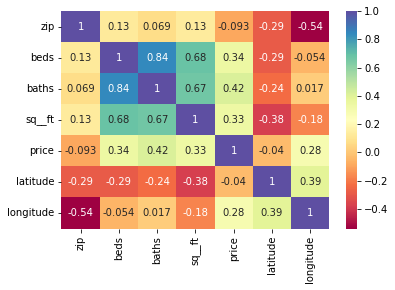

In [10]:
sns.heatmap(data=df.corr(),annot=True, cmap='Spectral')

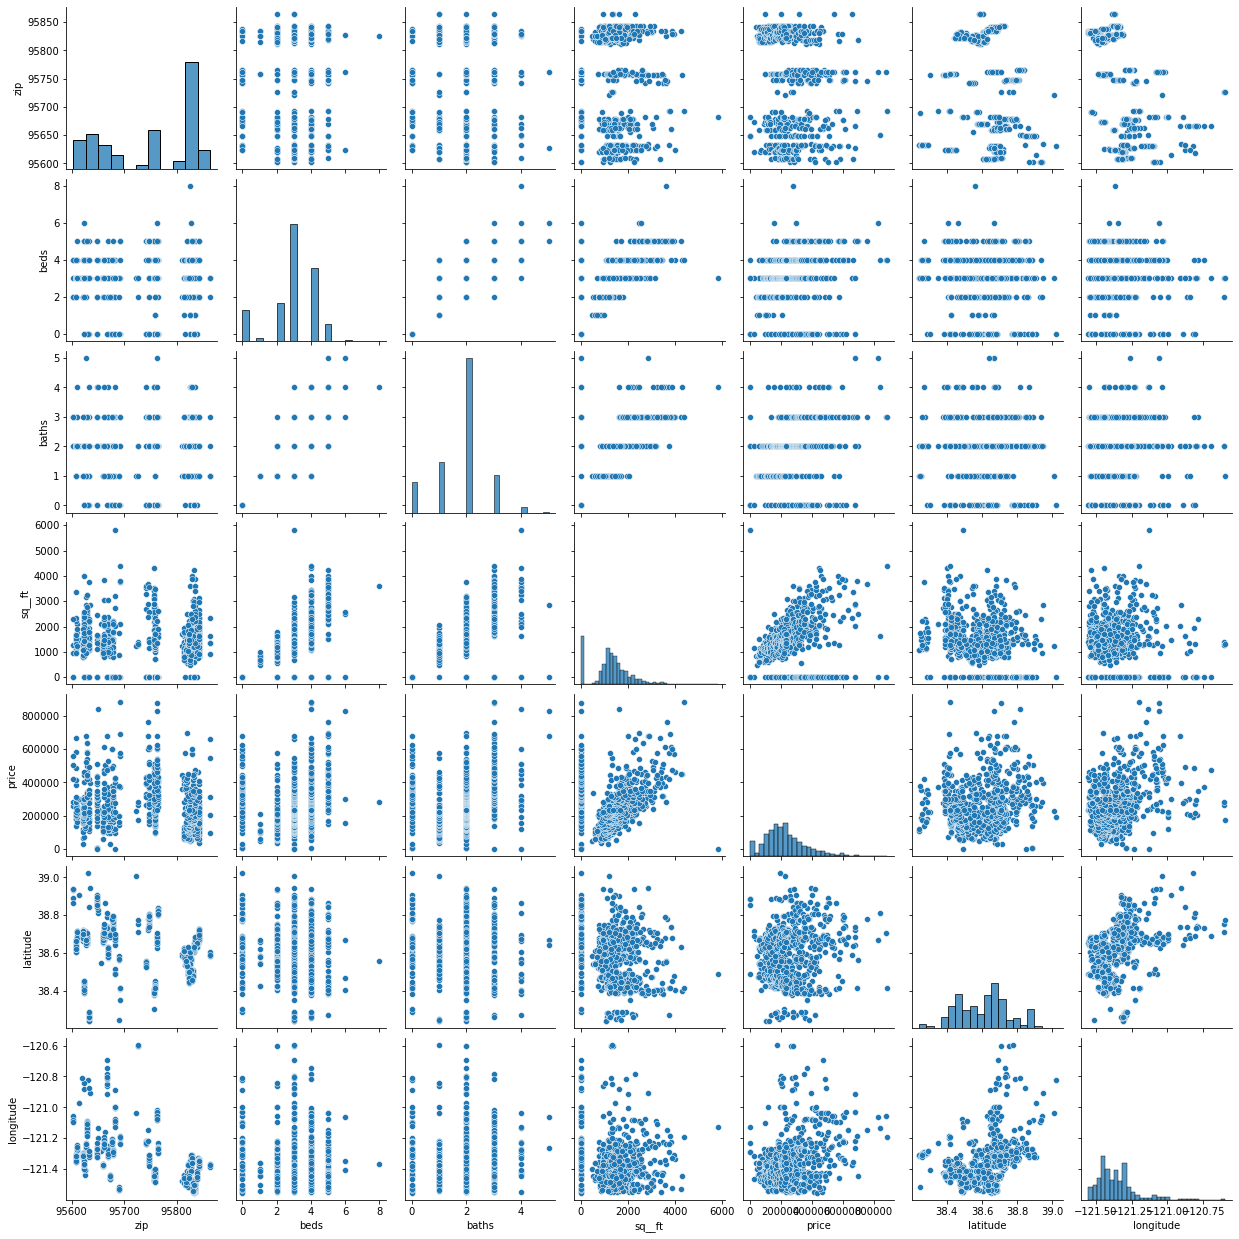

In [11]:
sns.pairplot(data=df)

In [18]:
#dropping observations with sq__ft of 0
df = df[(df.sq__ft != 0)]

In [17]:
df.shape

(814, 12)

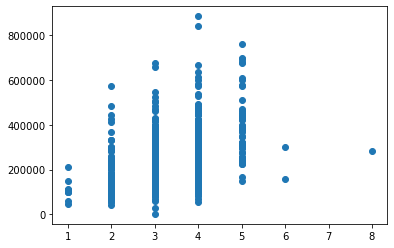

In [18]:
plt.scatter(x='beds',y='price',data=df)

Our bedst predicotr would be sq__ft

#### 2.4 What is the simplest way to predict price

So we have information for 985 houses. What is the easiest way to predict price of a house?

In [12]:
# ANSWER
#overall easiest way but also likely to be incorrect
df.price.mean()

234144.26395939087

In [13]:
#split into larger and smaller houses to potentially reduce error
print(f'Large house mean {round(df.price[df.beds >= 4].mean(),2)}$')
print(f'Small house mean {round(df.price[df.beds < 4].mean(),2)}$')

Large house mean 306001.11$
Small house mean 199406.24$


#### 2.5 Find Resudals

Find difference between actual value and predicted value. Use absolute value.

In [14]:
# ANSWER
resedual = abs(df.price - df['price'].mean())
resedual

0      174922.263959
1      165932.263959
2      165264.263959
3      164837.263959
4      152244.263959
           ...      
980      1719.263959
981       144.263959
982       855.736041
983      1156.736041
984      1593.736041
Name: price, Length: 985, dtype: float64

#### 2.6  Predict Using Linear Regression

[Simple Linear Regression](https://en.wikipedia.org/wiki/Simple_linear_regression#Fitting_the_regression_line)

### $$\hat{y} = \beta_0 + \beta_1 x$$

> ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

and

> ### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

Given variables:
- $\bar{y}$ : the sample mean of observed values $Y$
- $\bar{x}$ : the sample mean of observed values $X$

##### 2.7 Define X, Y

- X = Predictor Variable 
- Y = Target Variable

In [20]:
# ANSWER
x = df['sq__ft']
y = df['price']

##### 2.7.A Calculate beta_1

 ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

In [21]:
# ANSWER
def calc_beta1(x,y):
    yi = y
    xi = x
    y_mean = y.mean()
    x_mean = x.mean()
    
    num = ((yi-y_mean)*(xi-x_mean)).sum()
    
    den = ((xi-x_mean)**2).sum()
    
    beta1 = num / den
    
    return beta1

calc_beta1(x,y)

125.21648667984462

In [22]:
beta1 = ((y-y.mean())*(x-x.mean())).sum()/((x-x.mean())**2).sum()
beta1

125.21648667984462

##### 2.7.B Calculate beta_0

### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

In [23]:
# ANSWER
def calc_beta0(x,y):
    y_mean = y.mean()
    x_mean = x.mean()
    
    beta0 = y_mean - calc_beta1(x,y)*x_mean
    
    return beta0, beta1

b0, b1 = calc_beta0(x,y)
print(f'beta 0 is {round(b0,2)}')
print(f'beta 1 is {round(b1,2)}')
    

beta 0 is 30210.63
beta 1 is 125.22


##### 2.7.C Find Yhat (Predicted Value Using Beta 0 and Beta 1)

### $$\hat{y} = \beta_0 + \beta_1 x$$

In [24]:
# ANSWER
y_hat = b0 + b1*x
y_hat

0      134891.616731
1      176338.273822
2      129882.957264
3      136895.080518
4      130008.173751
           ...      
980    315704.223497
981    215155.384693
982    182473.881670
983    241200.413922
984    200755.488725
Name: sq__ft, Length: 814, dtype: float64

In [25]:
y_hat_messy = (y.mean() - (((y-y.mean())*(x-x.mean())).sum()/((x-x.mean())**2).sum())*x.mean())+(((y-y.mean())*(x-x.mean())).sum()/((x-x.mean())**2).sum())*x
y_hat_messy

0      134891.616731
1      176338.273822
2      129882.957264
3      136895.080518
4      130008.173751
           ...      
980    315704.223497
981    215155.384693
982    182473.881670
983    241200.413922
984    200755.488725
Name: sq__ft, Length: 814, dtype: float64

##### 2.7.D Find Residuals

### $$ \text{residual}_i = y_i - \hat{y}_i$$

In [27]:
# ANSWER
res_i = y - y_hat
res_i

0      -75669.616731
1     -108126.273822
2      -61002.957264
3      -67588.080518
4      -48108.173751
           ...      
980    -83279.223497
981     18844.615307
982     52526.118330
983     -5899.413922
984     34982.511275
Length: 814, dtype: float64

##### 2.7.E Find R-Square

The coefficient $R^2$ is defined as $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$, where $$ SS_{res} $$ is the residual sum of squares $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$ and $$ SS_{res} $$ is the total sum of squares $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

**Write a function to calculate R- Square value.**

The total sum of squares:

### $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The residual sum of squares:

### $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$

$R^2$:

### $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$

In [30]:
# ANSWER
def total_sum_of_sq(y):
    ss_tot = (y-y.mean())**2
    
    return ss_tot

In [29]:
def res_sum_sq(y, y_hat):
    ss_res = (y - y_hat)** 2
    
    return ss_res

In [31]:
def r_sq(y, y_hat):
    ss_tot = total_sum_of_sq(y)
    ss_res = res_sum_sq(y, y_hat)
    r_square = 1-(ss_res/ss_tot)
    
    return r_square

In [34]:
Rsq = r_sq(y, y_hat)
Rsq

0        0.802399
1        0.550286
2        0.855662
3        0.821872
4        0.893691
          ...    
980   -781.750873
981    -16.141176
982    -88.517831
983     -0.016051
984    -29.935115
Length: 814, dtype: float64


##### 2.7.F [BONUS] Draw Plot of Predicted Line

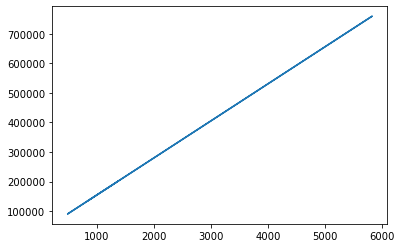

In [37]:
# ANSWER
plt.plot(x, (b0+b1*x))

##### 2.7.G [BONUS] Draw Plot of Predicted Line With Resudals

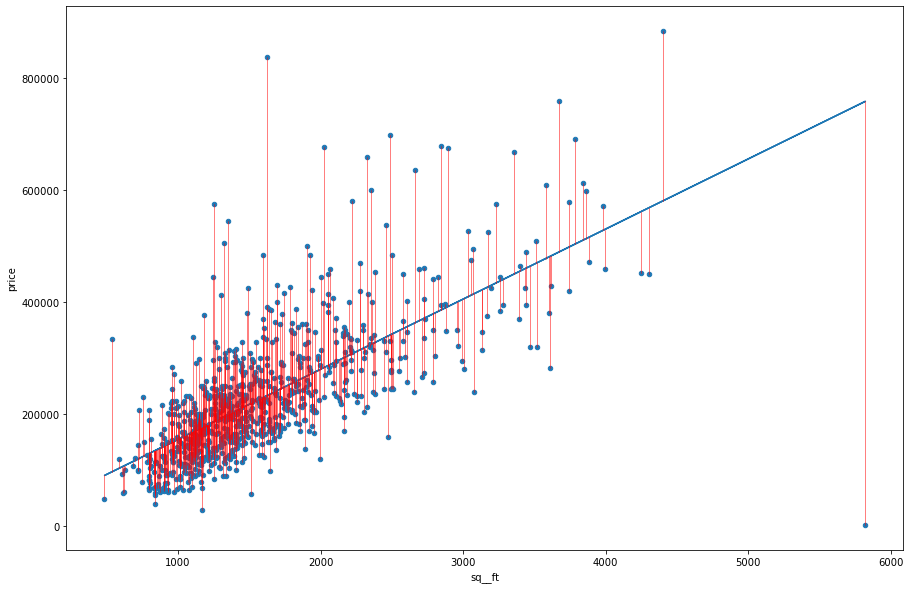

In [66]:
# ANSWER
df.plot.scatter('sq__ft','price',figsize=(15,10))
plt.plot(x,y_hat)
plt.plot([x,x],
        [y,y_hat],
        color='red',
        lw=0.5,
        )
plt.show()

### 3. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house.**

In [39]:
# ANSWER
price = round(b0+b1*1204,2)
price

180971.28



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



